<a href="https://colab.research.google.com/github/Isyaanggita/Netflix-Stock-Price-Anomaly-Detection/blob/main/Netflix_Stock_Price_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from google.colab import  drive

In [2]:
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Datasets"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Athletes.xlsx  EntriesGender.xlsx  netflix.csv
Coaches.xlsx   Medals.xlsx	   Teams.xlsx


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/netflix.csv')
df = df.iloc[4000:,:]
df['Date']=pd.to_datetime(df['Date'])
df

,Date,High,Low,Open,Close,Volume,Adj Close
4000,2018-04-13,317.489990,308.230011,317.290009,311.649994,12046600.0,311.649994
4001,2018-04-16,316.100006,304.000000,315.989990,307.779999,20307900.0,307.779999
4002,2018-04-17,338.619995,323.769989,329.660004,336.059998,33866500.0,336.059998
4003,2018-04-18,338.820007,331.100006,336.299988,334.519989,11221100.0,334.519989
4004,2018-04-19,335.309998,326.769989,332.880005,332.700012,8438800.0,332.700012
...,...,...,...,...,...,...,...
4851,2021-08-30,567.159973,556.450012,557.250000,566.179993,2434800.0,566.179993
4852,2021-08-31,569.479980,561.609985,566.119995,569.190002,2431900.0,569.190002
4853,2021-09-01,591.000000,569.000000,569.000000,582.070007,5626200.0,582.070007
4854,2021-09-02,598.760010,583.679993,583.679993,588.549988,6179900.0,588.549988


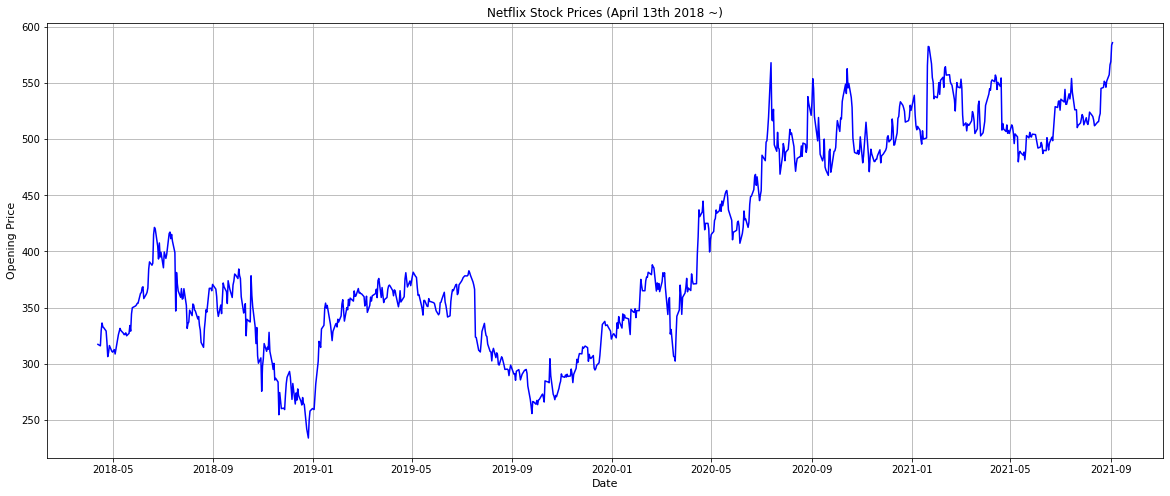

In [4]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(df["Date"], df["Open"], color='Blue')
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Opening Price', fontsize='11')
plt.title('Netflix Stock Prices (April 13th 2018 ~)')
plt.grid()
plt.show()

In [5]:
df = df.drop(columns=['High','Low','Close','Volume','Adj Close'])

In [6]:
for i in range(len(df)):
    df['Date'][i+4000] = i
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open
4000,0,317.290009
4001,1,315.989990
4002,2,329.660004
4003,3,336.299988
4004,4,332.880005
...,...,...
4851,851,557.250000
4852,852,566.119995
4853,853,569.000000
4854,854,583.679993


In [7]:
# create model
nbrs = NearestNeighbors(n_neighbors = 5)
# fit model
nbrs.fit(df)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

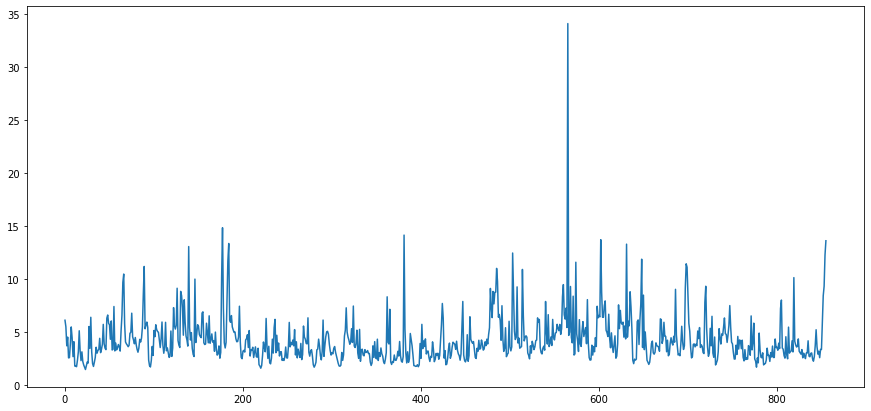

In [8]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [9]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0       6.107465
1       5.490413
2       3.696324
3       4.515146
4       2.556859
         ...    
851     5.876707
852     8.420454
853     9.320061
854    12.266251
855    13.599760
Length: 856, dtype: float64

In [10]:
distances_mean.describe()

count    856.000000
mean       4.264448
std        2.268121
min        1.461943
25%        2.907046
50%        3.703599
75%        4.973407
max       34.076126
dtype: float64

In [11]:
# Because 75th percentice is 4.9, will set threshold into 5.0

outlier_index = np.where(distances_mean > 5.0)
outlier_index

(array([  0,   1,   7,  16,  27,  29,  43,  47,  48,  49,  50,  52,  55,
         63,  64,  65,  66,  67,  75,  87,  88,  89,  90,  91,  92,  93,
        100, 102, 103, 104, 109, 113, 119, 122, 123, 124, 125, 126, 130,
        131, 132, 134, 135, 139, 140, 146, 149, 150, 154, 155, 159, 162,
        176, 177, 178, 182, 183, 184, 185, 186, 187, 188, 189, 196, 207,
        226, 235, 236, 252, 258, 268, 273, 290, 294, 295, 315, 316, 317,
        322, 324, 328, 331, 362, 365, 381, 382, 401, 423, 424, 425, 446,
        447, 455, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487,
        488, 489, 491, 495, 499, 503, 504, 505, 508, 514, 515, 531, 532,
        533, 540, 543, 548, 553, 554, 555, 556, 558, 559, 560, 561, 562,
        563, 564, 565, 568, 571, 574, 578, 581, 582, 584, 585, 587, 598,
        599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 611, 622, 623,
        624, 625, 626, 627, 629, 631, 633, 634, 635, 636, 637, 643, 644,
        646, 647, 648, 650, 652, 669, 670, 673, 686

In [12]:
outlier_values = df.iloc[outlier_index]
outlier_values

,Date,Open
4000,0,317.290009
4001,1,315.989990
4007,7,319.220001
4016,16,321.989990
4027,27,334.049988
...,...,...
4851,851,557.250000
4852,852,566.119995
4853,853,569.000000
4854,854,583.679993


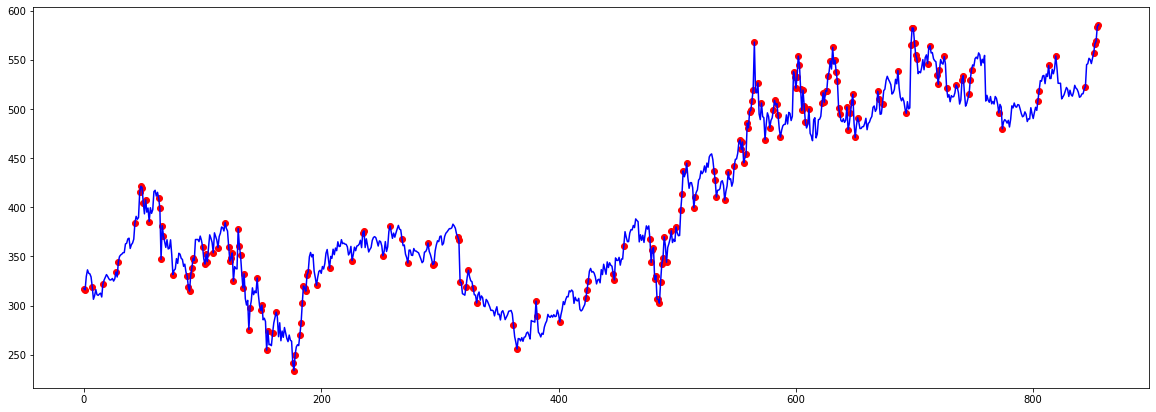

In [13]:
# plot data
plt.figure(figsize=(20, 7))
plt.plot(df["Date"], df["Open"], color = "b")

# plot outlier values
plt.scatter(outlier_values["Date"], outlier_values["Open"], color = "r")